# Data 200: Database Systems and Data Management for Data Analytics


# Take-Home Final Exam

**Dickinson College**<br/>
**Fall 2022**<br/>
Prof. Eren Bilen<br/>
<font color='red'>**Due Date:** Friday December 16, 12pm (noon) </font>
---
Enter your name in the markdown cell below.

# Name: ASHLEY DOAN

In [3]:
!pip install selenium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 7.2 MB/s eta 0:00:00a 0:00:01m
  Attempting uninstall: attrs
    Found existing installation: attrs 23.1.0
    Uninstalling attrs-23.1.0:
      Successfully uninstalled attrs-23.1.0


In [5]:
from selenium import webdriver
import pandas as pd
import re
import time 
import random
import matplotlib.pyplot as plt
import numpy as np

# Scraping task

On this exam, you will scrape reviews from BestBuy.com. The item for which you will scrape reviews for will depend on the first letter of your last name. Check the table below (both letters inclusive) for your assigned item:

|First letter of your last name | Item/link to reviews on BestBuy.com
| :---        |    :---   |
|A-G | https://www.bestbuy.com/site/reviews/microsoft-xbox-series-x-1tb-console-black/6428324?variant=A&skuId=6428324
|H-M | https://www.bestbuy.com/site/reviews/apple-airpods-with-charging-case-2nd-generation-white/6084400?variant=A&skuId=6084400
|N-S | https://www.bestbuy.com/site/reviews/samsung-65-class-7-series-led-4k-uhd-smart-tizen-tv/6401722?variant=A&skuId=6401722
|T-Z | https://www.bestbuy.com/site/reviews/nintendo-switch-32gb-lite-turquoise/6257139?variant=A&skuId=6257139


Your goal is to scrape 2,000 reviews that were posted in the reviews page of your assigned item. The format of your output should be a dataframe with the following columns/format:
<br>
![title](ss1.png)

where
```
username: the user name of the reviewer
review: the review content
rating: the rating (out of 5) left by the reviewer
helpful: the number of votes received on the review indicating that the review is helpful
unhelpful: the number of votes received on the review indicating that the review is unhelpful
net: |helpful - unhelpful| i.e., the absolute value of the difference between "helpful" and "unhelpful" votes
nethelpful: helpful - unhelpful i.e., the difference between "helpful" and "unhelpful" votes
total: total number of votes (helpful + unhelpful) received
length: length of the review, defined as the number of characters in a review (including whitespace)
```

Include the `.ipynb` and `.md` versions of your work + the following two scatterplots as part of your output. Comment on what you observe from the scatterplots. Are you surprised?
* scatterplot with `length` on the x axis, `total` on the y axis
* scatterplot with `length` on the x axis, `nethelpful` on the y axis

Commit and push on Github once you finish.

Hints: 
* You will need to scrape multiple pages. Make sure to wait at least 2 seconds between each page, e.g., using `time.sleep(random.uniform(2, 3))`.
* Trim away `\n` from review strings as it contains no useful information, and can cause bugs in regex.
* Make sure to get the position of the "next Page" button, as its position can change dynamically depending on the page number.

Good luck!

In [7]:
driver = webdriver.Chrome(r"E:\chromedriver_win32\chromedriver.exe")
driver.get("https://www.bestbuy.com/site/reviews/microsoft-xbox-series-x-1tb-console-black/6428324?variant=A&skuId=6428324")

AttributeError: 'str' object has no attribute 'capabilities'

In [21]:
def get_comments():
    comments = []
    for x in range(1,21):
        # the user name of the reviewer
        userid_element = driver.find_element('xpath','//*[@id="reviews-accordion"]/div[1]/ul/li[{}]/div/div[2]/div[2]/div[1]/span/span/button/div/strong'.format(x))
        user = userid_element.text

        # the review content
        review_element = driver.find_element('xpath','//*[@id="reviews-accordion"]/div[1]/ul/li[{}]/div/div[2]/div[4]'.format(x))
        review = review_element.text.replace('\n','')

        # the rating (out of 5) left by the reviewer
        rating_element = driver.find_element('xpath','//*[@id="reviews-accordion"]/div[1]/ul/li[{}]/div/div[2]/div[1]/div/div'.format(x))
        rating = rating_element.text
        cleaned_rating = int(''.join(re.findall("Rated (.*?) out", rating)))

        # the number of votes received on the review indicating that the review is helpful
        helpful_element = driver.find_element('xpath','//*[@id="reviews-accordion"]/div[1]/ul/li[{}]/div/div[2]/div[6]/div/div/div[1]/button[1]'.format(x))
        helpful = helpful_element.text
        cleaned_helpful = int(''.join(re.findall("[0-9]+", helpful)))

        # the number of votes received on the review indicating that the review is unhelpful
        unhelpful_element = driver.find_element('xpath','//*[@id="reviews-accordion"]/div[1]/ul/li[{}]/div/div[2]/div[6]/div/div/div[1]/button[2]'.format(x))
        unhelpful = unhelpful_element.text
        cleaned_unhelpful = int(''.join(re.findall("[0-9]+", unhelpful)))

        # |helpful - unhelpful| i.e., the absolute value of the difference between "helpful" and "unhelpful" votes
        net = abs(cleaned_helpful - cleaned_unhelpful)

        # helpful - unhelpful i.e., the difference between "helpful" and "unhelpful" votes
        net_helpful = cleaned_helpful - cleaned_unhelpful

        # total number of votes (helpful + unhelpful) received
        total = cleaned_helpful + cleaned_unhelpful

        # length of the review, defined as the number of characters in a review (including whitespace)
        length = len(review)

        comments.append([user, review, cleaned_rating, cleaned_helpful, cleaned_unhelpful, net, net_helpful, total, length])

    return comments

In [59]:
# go to first page
driver.get('https://www.bestbuy.com/site/reviews/microsoft-xbox-series-x-1tb-console-black/6428324?variant=A&skuId=6428324')

# create an empty data frame
df_out = pd.DataFrame()

# loop over 100 pages
for j in range(0,100):
    try:
        # get comments
        comments = get_comments()

        # create a dataframe (df) with current page data
        df = pd.DataFrame(comments,columns=['userid','review','rating','helpful','unhelpful', 'net', 'net_helpful', 'total', 'review_length'])

        # df_out with the entire data
        df_out = pd.concat([df_out,df])

        # find the location of the next page button, then click on it
        button = driver.find_element('xpath','//*[@title="next Page"]')
        button.click()
        
        # wait between 2-3 seconds
        time.sleep(random.uniform(2,3))
        
    except:
        print('Error!')

Error!
Error!
Error!
Error!
Error!


In [60]:
df_out.reset_index(drop=True)

,userid,review,rating,helpful,unhelpful,net,net_helpful,total,review_length
0,Andrew,I used to own an Xbox One X and some people wi...,5,75,19,56,56,94,1680
1,EdmondC,Could not wait to pick it up at the store!!!As...,5,5,0,5,5,5,653
2,Misphit,"I love it, most people are deciding to get one...",5,4,2,2,2,6,726
3,Sunday,"After two years of trying, I finally got my ha...",5,0,0,0,0,0,849
4,N8Mare39,Ive been a playstation fanboy all my life! Eve...,5,59,40,19,19,99,1477
...,...,...,...,...,...,...,...,...,...
1995,RandallA,Loads of gaming fun. This is an excellent choi...,5,0,0,0,0,0,67
1996,Sick,Huge difference between Xbox one s and series ...,5,0,0,0,0,0,145
1997,Bryan,Love it. Waited forever to get one. The speed ...,5,0,0,0,0,0,94
1998,AshleyD,We haven’t opened this product yet because it ...,5,0,0,0,0,0,65


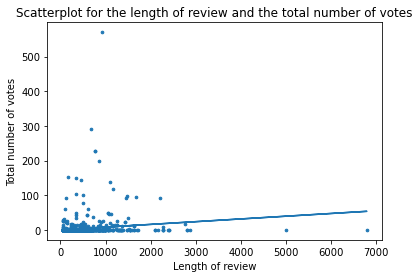

In [61]:
# scatterplot for review_length and total
a, b = np.polyfit(df_out['review_length'], df_out['total'], 1)
plt.scatter(df_out['review_length'], df_out['total'], s = 7)
plt.title("Scatterplot for the length of review and the total number of votes")
plt.xlabel("Length of review")
plt.ylabel("Total number of votes")
plt.plot(df_out['review_length'], a*df_out['review_length']+b)
plt.show()

In [62]:
# correlation coefficient of review_length and total
np.corrcoef(df_out['review_length'], df_out['total'])

array([[1.        , 0.15328302],
       [0.15328302, 1.        ]])

Both the best fit line (slightly upward sloping) and Pearson correlation coefficient (0.15) suggest a weak positive association 
between the length of reviews and the total number of votes received for that review. I find this surprising because I thought 
normally longer reviews will get more attention and thus get more votes. However, the correlation is not really significant.

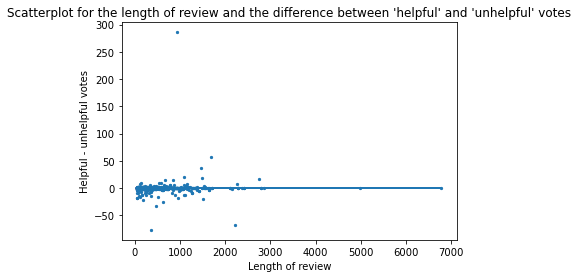

In [63]:
# scatterplot for review_length and net_helpful
a, b = np.polyfit(df_out['review_length'], df_out['net_helpful'], 1)
plt.scatter(df_out['review_length'], df_out['net_helpful'], s = 5)
plt.title("Scatterplot for the length of review and the difference between 'helpful' and 'unhelpful' votes")
plt.xlabel("Length of review")
plt.ylabel("Helpful - unhelpful votes")
plt.plot(df_out['review_length'], a*df_out['net_helpful']+b)
plt.show()

In [64]:
# correlation coefficient of review_length and net_helpful
np.corrcoef(df_out['review_length'], df_out['net_helpful'])

array([[1.        , 0.03416427],
       [0.03416427, 1.        ]])

Both the best fit line (almost flat) and Pearson correlation coefficient (0.03) suggest that there is almost no association 
between the length of reviews and the difference between 'helpful' and 'unhelpful' votes. This outcome surprised me as I assumed longer reviews are usually deemed helpful and thus there would be a strong positive correlation between the two variables. 